In [1]:
import logging
from ban.base.logging.log import SeoungSimLogger
from ban.config.JSONConfig import JSONConfig
import simpy
from simpy.events import NORMAL

from ban.base.helper.mobility_helper import MobilityHelper, MovementPhase
from ban.base.mobility import MobilityModel, BodyPosition

import matplotlib.pyplot as plt

env = simpy.Environment()

# 앞에 애들은 움직이지 않는 애들임
positions = tuple(BodyPosition)[7:]
mob_helper = MobilityHelper(env)

INITIAL_DELAY = int(JSONConfig.get_config("initial_delay"))

time = env.now

mobs = []
for pos in positions:
    mob = MobilityModel(pos)
    mobs.append(mob)
    mob_helper.add_mobility_list(mob)

mobs_pos = [[] for _ in range(len(positions))]

logger = SeoungSimLogger("PRINT", logging.CRITICAL)

def print_info(ev):
    global time, logger

    if mob_helper.left_hand_direction * mob_helper.right_hand_direction ==  1:
        if mob_helper.left_leg_direction * mob_helper.right_leg_direction == 1:
            print(env.now - time)
            time = env.now
            for idx, mob in enumerate(mob_helper.mobility_list):
                pos = mob.get_position()
                mobs_pos[idx].append((pos.x, pos.y, pos.z))

    event = simpy.Event(env)
    event.env = env
    event._ok = True
    event.callbacks.append(print_info)
    
    logger.log(env.now, "logging")
    env.schedule(event, priority=NORMAL, delay=0.05)

event = simpy.Event(env)
event.env = env
event._ok = True
event.callbacks.append(mob_helper.do_walking)
env.schedule(event, priority=NORMAL, delay=0)

event = simpy.Event(env)
event.env = env
event._ok = True
event.callbacks.append(print_info)
env.schedule(event, priority=NORMAL, delay=INITIAL_DELAY) # 999.4

def init_time(ev):
    global time

    time = env.now

event = simpy.Event(env)
event.env = env
event._ok = True
event.callbacks.append(init_time)
env.schedule(event, priority=NORMAL, delay=INITIAL_DELAY)
# 0.45
env.run(until=INITIAL_DELAY + 100) # 999.75

0.49999999999999994
0.9500000000000006
0.9999999999999987
0.9999999999999964
1.0499999999999963
0.9999999999999964
0.9999999999999964
0.9999999999999964
1.0000000000000044
1.0000000000000142
1.0000000000000142
1.0000000000000142
1.0000000000000142
1.0000000000000142
1.0000000000000142
1.0000000000000142
1.0000000000000142
0.9500000000000135
1.0000000000000142
1.0000000000000142
1.0000000000000142
1.0000000000000142
1.0000000000000142
1.0000000000000142
1.0000000000000142
1.0000000000000142
1.0000000000000142
1.0000000000000142
1.0000000000000142
1.0000000000000142
1.0000000000000142
1.0000000000000142
0.9999999999999822
0.9999999999999432
0.9999999999999432
0.9999999999999432
0.9999999999999432
0.9999999999999432
0.9999999999999432
0.9999999999999432
0.9999999999999432
0.9999999999999432
0.9999999999999432
0.9999999999999432
0.9999999999999432
0.9999999999999432
0.9999999999999432
0.9999999999999432
0.9999999999999432
0.9999999999999432
0.9999999999999432
0.9999999999999432
0.999999999

100%|██████████| 9/9 [00:00<00:00, 1224.26it/s]

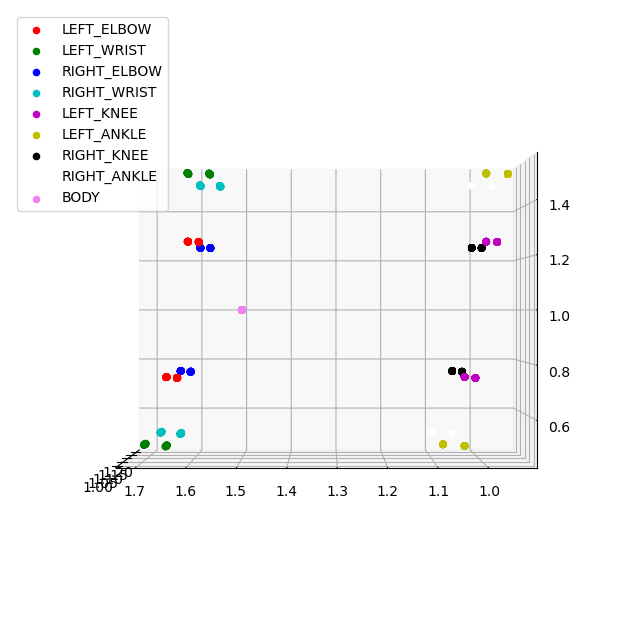

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from tqdm import tqdm

# 임의의 mobs_pos 리스트 생성
# mobs_pos = [...]

colors = ('r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'violet', 'purple', 'lavender', 'darkorange', 'crimson', 'darkcyan', 'crimson')
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.view_init(elev=0, azim=180)

for i, mob in enumerate(tqdm(mobs_pos)):
    xs, ys, zs = zip(*mob)  # 각 점의 x, y, z 좌표 분리
    ax.scatter(xs, ys, zs, color=colors[i % len(colors)], alpha=1, label=str(positions[i]).split('.')[1])  # 점들 그리기
    # ax.text(xs[0], ys[0], zs[0], str(positions[i]).split('.')[1], color="black")


ax.legend()
plt.show()


100%|██████████| 9/9 [00:00<00:00, 1292.10it/s]


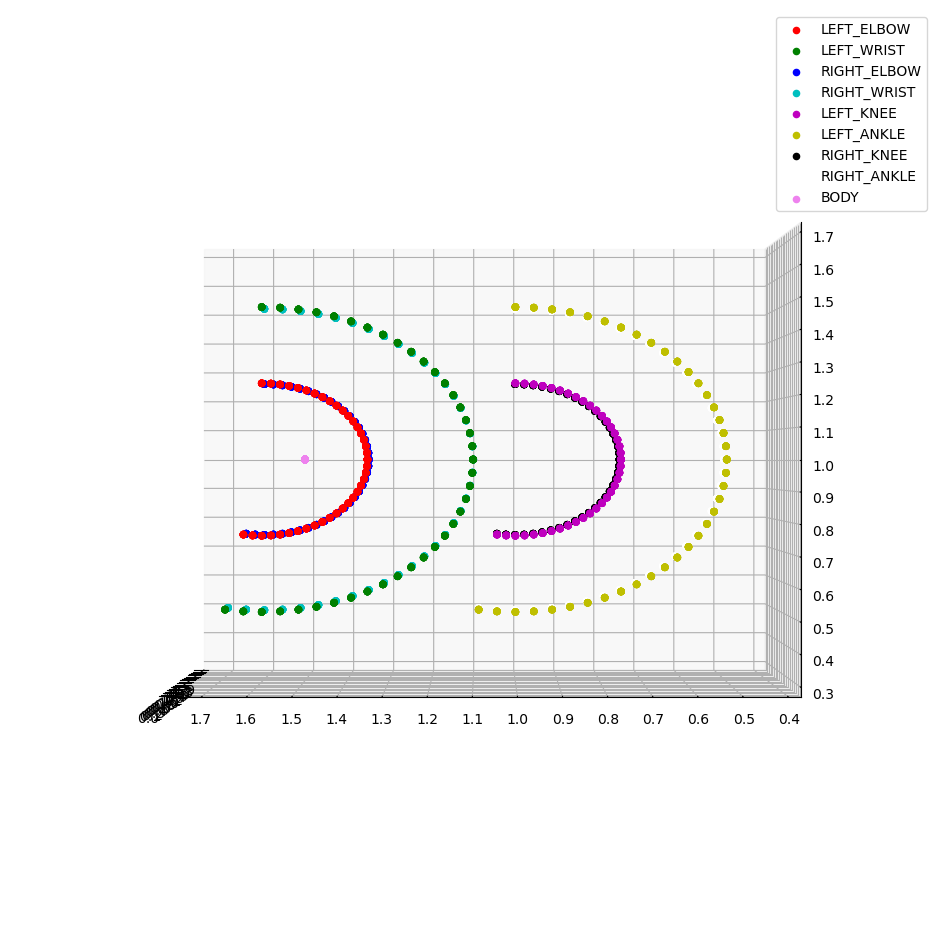

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

# 임의의 mobs_pos 리스트 생성
# mobs_pos = [...]

colors = ('r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'violet', 'purple', 'lavender', 'darkorange', 'crimson', 'darkcyan', 'crimson')
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

ax.view_init(elev=0, azim=180)

for i, mob in enumerate(tqdm(mobs_pos)):
    xs, ys, zs = zip(*mob)  # Each point's x, y, z coordinates
    ax.scatter(xs, ys, zs, color=colors[i % len(colors)], alpha=1, label=str(positions[i]).split('.')[1])  # Plot points

# Set tick spacing to 0.25 for all axes
ax.set_xticks(np.arange(0, 2, 0.1))
ax.set_yticks(np.arange(0.4, 1.8, 0.1))
ax.set_zticks(np.arange(0.3, 1.8, 0.1))

ax.legend()
plt.show()


앞뒤 x 가로 y 세로 z
DOWN인 경우 LOS 미확보로 가정

LOS 미확보 범위

ELBOW
DOWN(x, 1.6~, 0.7~0.8)

WRIST
DOWN(x, 1.6~, 0.5~0.6)

KNEE
DOWN(x, 0.95~, 0.7~0.8)

ANKLE
DOWN(x, 1.0~, 0.5~0.6)


In [ ]:
idx = 1

for idx in range(len(positions)):
    x = sorted([i for i, _, __ in mobs_pos[idx]])[-4:-1]
    y = sorted(([i for _, i, __ in mobs_pos[idx]]))[-20:-1]
    z = sorted(([i for _, __, i, in mobs_pos[idx]]))[-20:-1]

    print(positions[idx], "UP")
    print(f"x: {min(x):.3f} ~ {max(x):.3f}")
    print(f"y: {min(y):.3f} ~ {max(y):.3f}")
    print(f"z: {min(z):.3f} ~ {max(z):.3f}")

    x = sorted([i for i, _, __ in mobs_pos[idx]])[0:4]
    y =  sorted(([i for _, i, __ in mobs_pos[idx]]))[0:20]
    z = sorted(([i for _, __, i, in mobs_pos[idx]]))[0:20]

    print('\n' + str(positions[idx]), "DOWN")
    print(f"x: {min(x):.3f} ~ {max(x):.3f}")
    print(f"y: {min(y):.3f} ~ {max(y):.3f}")
    print(f"z: {min(z):.3f} ~ {max(z):.3f}")
    print("")

BodyPosition.LEFT_ELBOW UP
x: 1.000 ~ 1.000
y: 1.600 ~ 1.643
z: 1.246 ~ 1.250

BodyPosition.LEFT_ELBOW DOWN
x: 1.000 ~ 1.000
y: 1.350 ~ 1.351
z: 0.750 ~ 0.751

BodyPosition.LEFT_WRIST UP
x: 1.000 ~ 1.000
y: 1.600 ~ 1.687
z: 1.492 ~ 1.500

BodyPosition.LEFT_WRIST DOWN
x: 1.000 ~ 1.000
y: 1.100 ~ 1.102
z: 0.500 ~ 0.502

BodyPosition.RIGHT_ELBOW UP
x: 1.200 ~ 1.200
y: 1.600 ~ 1.643
z: 1.246 ~ 1.250

BodyPosition.RIGHT_ELBOW DOWN
x: 1.200 ~ 1.200
y: 1.350 ~ 1.351
z: 0.750 ~ 0.751

BodyPosition.RIGHT_WRIST UP
x: 1.200 ~ 1.200
y: 1.600 ~ 1.687
z: 1.492 ~ 1.500

BodyPosition.RIGHT_WRIST DOWN
x: 1.200 ~ 1.200
y: 1.100 ~ 1.102
z: 0.500 ~ 0.502

BodyPosition.LEFT_KNEE UP
x: 1.000 ~ 1.000
y: 1.000 ~ 1.043
z: 1.246 ~ 1.250

BodyPosition.LEFT_KNEE DOWN
x: 1.000 ~ 1.000
y: 0.750 ~ 0.751
z: 0.750 ~ 0.751

BodyPosition.LEFT_ANKLE UP
x: 1.000 ~ 1.000
y: 1.000 ~ 1.087
z: 1.492 ~ 1.500

BodyPosition.LEFT_ANKLE DOWN
x: 1.000 ~ 1.000
y: 0.500 ~ 0.502
z: 0.500 ~ 0.502

BodyPosition.RIGHT_KNEE UP
x: 1.200 ~ 